In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [322]:
df = pd.read_csv('stud_math.csv')

In [323]:
def outliers(col):
    """для определения выбросов"""
    IQR = col.quantile(0.75) - df.absences.quantile(0.25)
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)

    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    return

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       389 non-null    object 
 1   sex          389 non-null    object 
 2   age          389 non-null    int64  
 3   adress       389 non-null    object 
 4   fam_size     389 non-null    object 
 5   p_status     389 non-null    object 
 6   m_edu        389 non-null    float64
 7   f_edu        389 non-null    float64
 8   m_job        389 non-null    object 
 9   f_job        389 non-null    object 
 10  reason       389 non-null    object 
 11  guardian     389 non-null    object 
 12  travel_time  389 non-null    float64
 13  study_time   389 non-null    float64
 14  failures     389 non-null    float64
 15  school_sup   389 non-null    object 
 16  fam_sup      389 non-null    object 
 17  paid         389 non-null    object 
 18  activities   389 non-null    object 
 19  nursery 

In [418]:
df

,school,sex,age,adress,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,LE3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6,30.0
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,yes,4.0,3.0,2.0,3.0,10,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,False,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,other,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0,50.0


In [326]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

#### при осмотре налши лишний столбец. необходимо удалить

In [327]:
del df['studytime, granular'] #удаляем лишний столбец

In [328]:
#удобно назовём столбцы
df.columns = ['school', 'sex', 'age', 'adress', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities','nursery','higher', 'internet', 'romantic', 'fam_rel','free_time','go_out','health','absences','score']

In [329]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [330]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [331]:
df.age.isnull().sum()

0

In [332]:
df.adress.value_counts() 

U    295
R     83
Name: adress, dtype: int64

In [393]:
mask = df["adress"].isna()
p = df["adress"].value_counts() / len(df["adress"].dropna())
df.loc[mask, "adress"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [398]:
df.fam_size.value_counts()

GT3    270
LE3    119
Name: fam_size, dtype: int64

In [394]:
mask = df["fam_size"].isna()
p = df["fam_size"].value_counts() / len(df["fam_size"].dropna())
df.loc[mask, "fam_size"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [335]:
df.p_status.value_counts()

T    314
A     36
Name: p_status, dtype: int64

In [399]:
mask = df["p_status"].isna()
p = df["p_status"].value_counts() / len(df["p_status"].dropna())
df.loc[mask, "p_status"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [336]:
df.m_edu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: m_edu, dtype: int64

In [337]:
df.m_edu = df.m_edu.fillna(df.m_edu.median()) #заменили пустые значения на медианное

In [338]:
df.f_edu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: f_edu, dtype: int64

In [339]:
df.f_edu = df.f_edu.apply(lambda x: df.f_edu.median() if x>4 else x) #заменили выброс на медианное значение

In [340]:
df.f_edu = df.f_edu.fillna(df.f_edu.median()) #заменили пустые значения на медианное

In [341]:
df.m_job.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64

In [400]:
mask = df["m_job"].isna()
p = df["m_job"].value_counts() / len(df["m_job"].dropna())
df.loc[mask, "m_job"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [342]:
df.f_job.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

In [401]:
mask = df["f_job"].isna()
p = df["f_job"].value_counts() / len(df["f_job"].dropna())
df.loc[mask, "f_job"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [344]:
df.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [403]:
mask = df["reason"].isna()
p = df["reason"].value_counts() / len(df["reason"].dropna())
df.loc[mask, "reason"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [345]:
df.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [404]:
mask = df["guardian"].isna()
p = df["guardian"].value_counts() / len(df["guardian"].dropna())
df.loc[mask, "guardian"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [346]:
df.travel_time.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

In [347]:
df.travel_time = df.travel_time.fillna(df.travel_time.median()) #заменили пустые значения на медианное

In [348]:
df.study_time.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: study_time, dtype: int64

In [349]:
df.study_time = df.study_time.fillna(df.travel_time.median()) #заменили пустые значения на медианное

In [350]:
df.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [351]:
df.failures = df.failures.fillna(df.failures.median()) #заменили пустые значения на медианное

In [352]:
df.school_sup.value_counts()

no     335
yes     51
Name: school_sup, dtype: int64

In [405]:
mask = df["school_sup"].isna()
p = df["school_sup"].value_counts() / len(df["school_sup"].dropna())
df.loc[mask, "school_sup"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [353]:
df.fam_sup.value_counts()

yes    219
no     137
Name: fam_sup, dtype: int64

In [406]:
mask = df["fam_sup"].isna()
p = df["fam_sup"].value_counts() / len(df["fam_sup"].dropna())
df.loc[mask, "fam_sup"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [354]:
df.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [407]:
mask = df["paid"].isna()
p = df["paid"].value_counts() / len(df["paid"].dropna())
df.loc[mask, "paid"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [355]:
df.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [408]:
mask = df["activities"].isna()
p = df["activities"].value_counts() / len(df["activities"].dropna())
df.loc[mask, "activities"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [356]:
df.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [409]:
mask = df["nursery"].isna()
p = df["nursery"].value_counts() / len(df["nursery"].dropna())
df.loc[mask, "nursery"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [411]:
df.higher.value_counts()

yes    369
no      20
Name: higher, dtype: int64

In [410]:
mask = df["higher"].isna()
p = df["higher"].value_counts() / len(df["higher"].dropna())
df.loc[mask, "higher"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [358]:
df.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [412]:
mask = df["internet"].isna()
p = df["internet"].value_counts() / len(df["internet"].dropna())
df.loc[mask, "internet"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [414]:
df.romantic.value_counts()

no     251
yes    138
Name: romantic, dtype: int64

In [413]:
mask = df["romantic"].isna()
p = df["romantic"].value_counts() / len(df["romantic"].dropna())
df.loc[mask, "romantic"] = np.random.choice(p.index.to_list(), 
                     size=mask.sum(), 
                     p=p.to_list())

In [415]:
df.fam_rel.value_counts()

4.0    206
5.0     97
3.0     62
2.0     17
1.0      7
Name: fam_rel, dtype: int64

In [361]:
df.fam_rel = df.fam_rel.fillna(df.fam_rel.median()) #заменили пустые значения на медианное

In [362]:
df.fam_rel = df.fam_rel.apply(lambda x: df.fam_rel.median() if x<1 else x) # заменили некорректное значение за медианное

In [363]:
df.free_time.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: free_time, dtype: int64

In [364]:
df.free_time = df.free_time.fillna(df.free_time.median()) #заменили пустые значения на медианное

In [365]:
df.go_out.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

In [366]:
df.go_out = df.go_out.fillna(df.go_out.median()) #заменили пустые значения на медианное

In [367]:
df.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [368]:
df.health = df.health.fillna(df.health.median()) #заменили пустые значения на медианное

In [377]:
df.absences.value_counts()

0.0     128
4.0      65
2.0      60
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
9.0       3
1.0       3
13.0      2
11.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

In [372]:
outliers(df.absences) #проверяем на выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


содержит выбросы, необходимо устранить

In [373]:
absences_mean = round(df.absences[df.absences<20].mean(),0)

In [374]:
df.absences = df.absences.apply(lambda x: x == absences_mean if x>20 else x) #устраняем выбросы, заменив их на медианное

In [375]:
df.absences = df.absences.fillna(absences_mean) #заменили пустые значения на медианное

In [295]:
df.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [378]:
df.dropna(subset=['score'],inplace=True) #удалили строки с пустыми значениями score

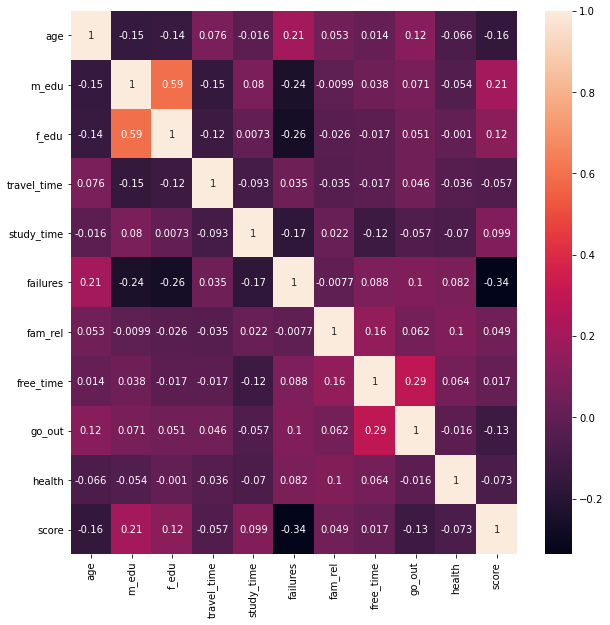

In [420]:
sns.heatmap(df.corr(),annot = True) # cтроим тепловую карту для наглядности коэф-а коррекляции
fig = plt.gcf()
fig.set_size_inches(10,10)

#### выраженная связь у двух признаков "f_edu" и 'm_edu'



In [380]:
def get_boxplot(column):
    """функция для построения боксплота столбцов"""
    fig, ax = plt.subplots(figsize=(14,4))
    sns.boxplot(x=column,y='score',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title("Boxplot for " + column)
    plt.show()

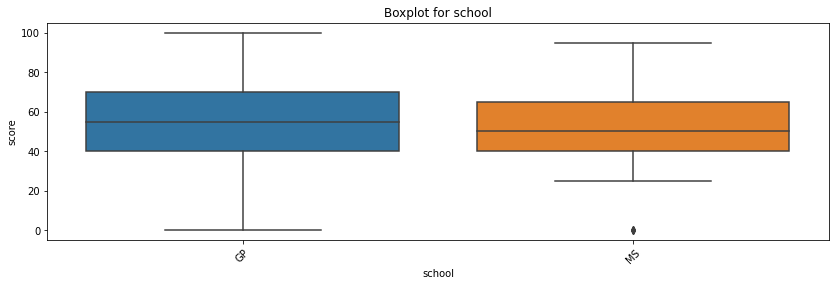

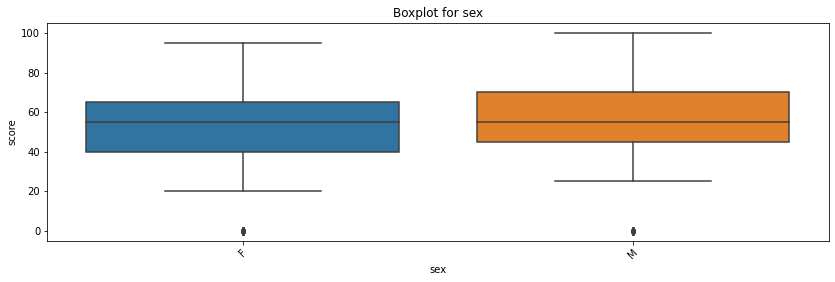

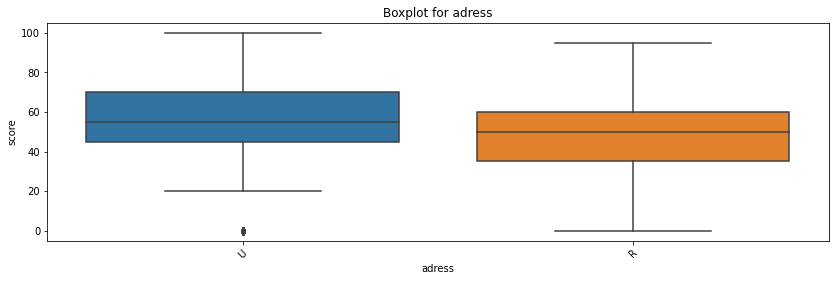

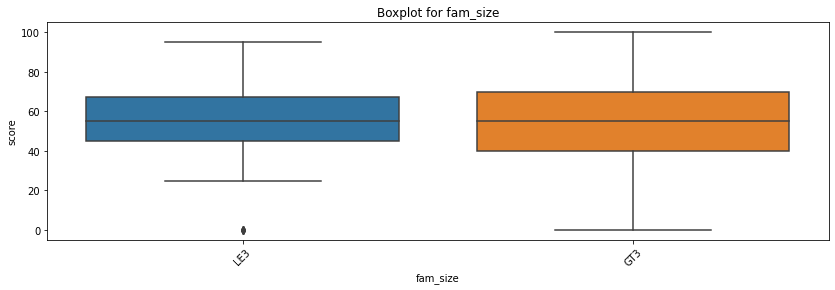

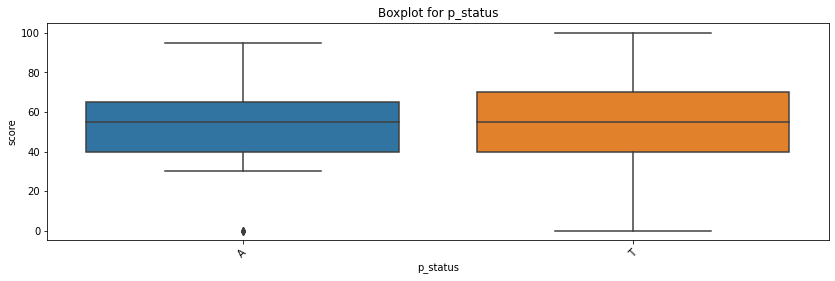

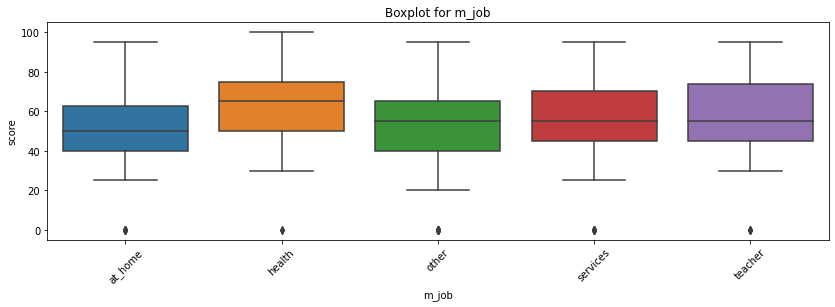

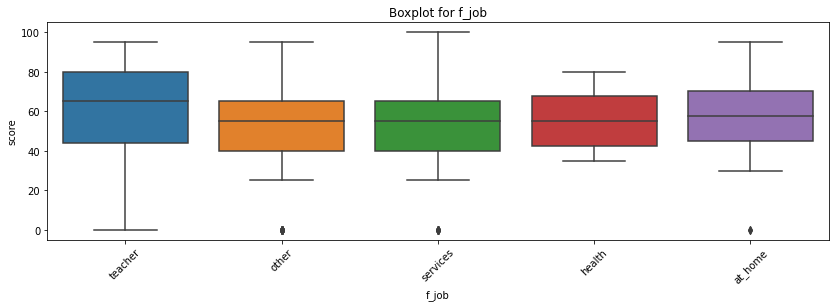

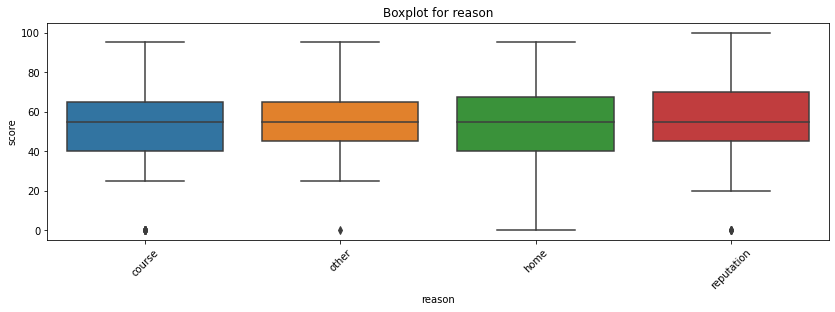

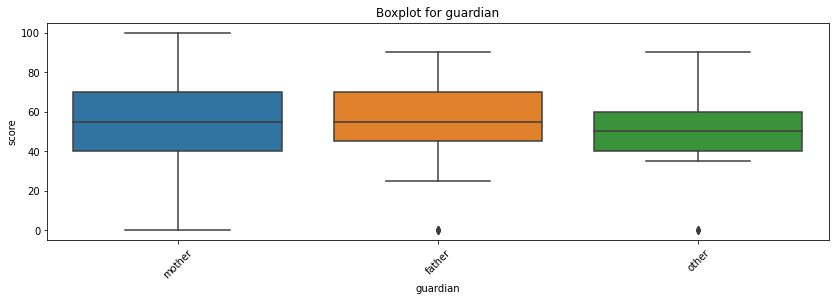

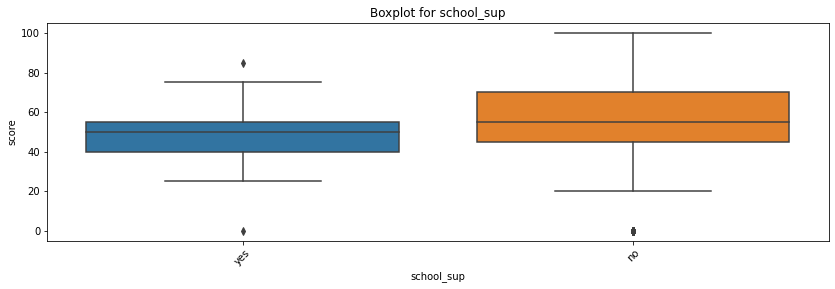

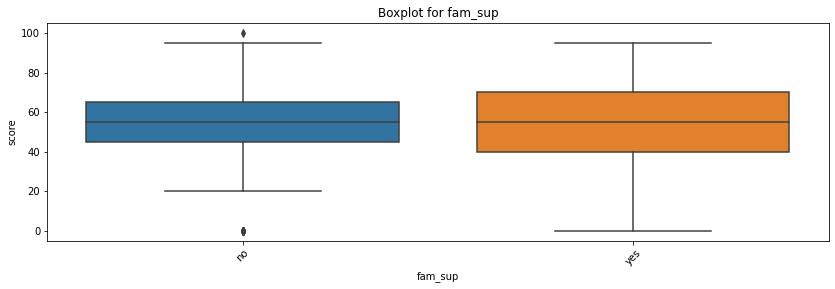

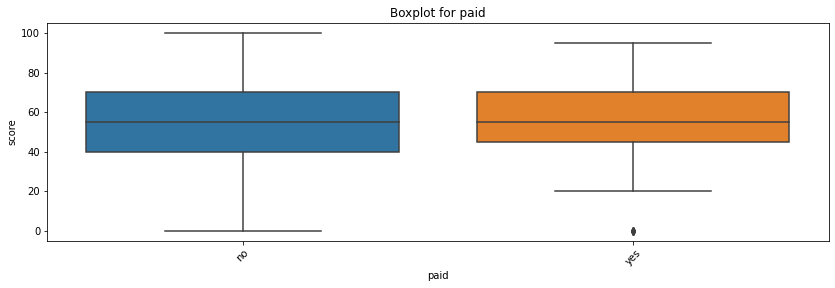

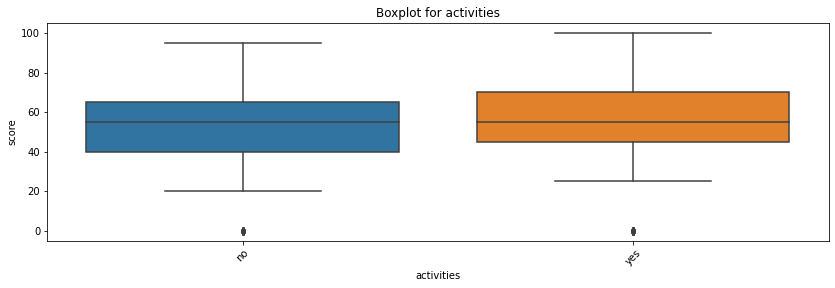

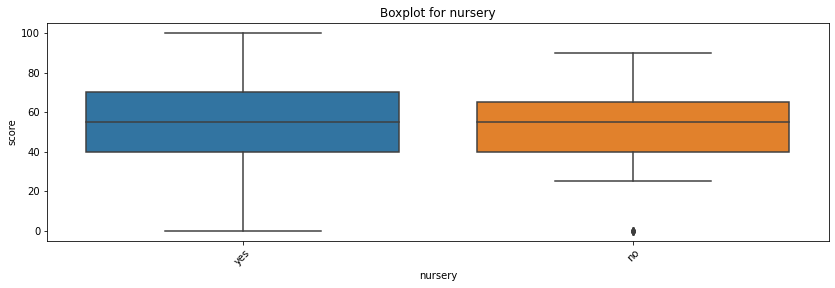

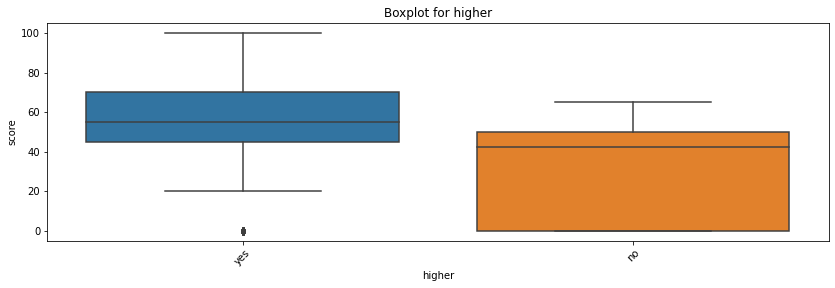

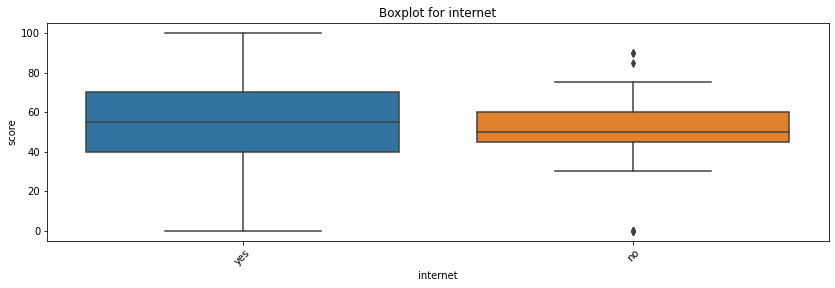

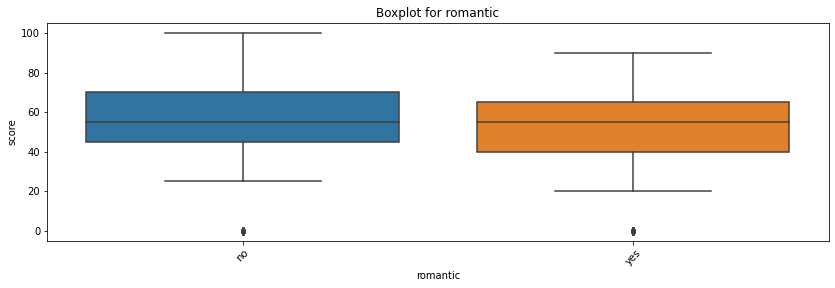

In [419]:
#строим боксплоты
for col in['school','sex','adress','fam_size','p_status','m_job','f_job','reason','guardian','school_sup','fam_sup','paid',
          'activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

In [417]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [383]:
for col in ['school','sex','adress','fam_size','p_status','m_job','f_job','reason','guardian','school_sup','fam_sup','paid',
          'activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

In [384]:
df.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,score
age,1.000000,-0.146405,-0.137748,0.076013,-0.016071,0.206279,0.053021,0.013994,0.121057,-0.065719,-0.155726
m_edu,-0.146405,1.000000,0.594161,-0.152597,0.079519,-0.239668,-0.009936,0.037699,0.071235,-0.054431,0.209758
f_edu,-0.137748,0.594161,1.000000,-0.118999,0.007331,-0.259293,-0.025886,-0.016685,0.051316,-0.001031,0.123476
travel_time,0.076013,-0.152597,-0.118999,1.000000,-0.093233,0.035113,-0.034992,-0.016696,0.046390,-0.035852,-0.056535
study_time,-0.016071,0.079519,0.007331,-0.093233,1.000000,-0.170733,0.022324,-0.124978,-0.056549,-0.069996,0.099017
failures,0.206279,-0.239668,-0.259293,0.035113,-0.170733,1.000000,-0.007672,0.087558,0.101036,0.082165,-0.337187
fam_rel,0.053021,-0.009936,-0.025886,-0.034992,0.022324,-0.007672,1.000000,0.156171,0.061699,0.099614,0.048896
free_time,0.013994,0.037699,-0.016685,-0.016696,-0.124978,0.087558,0.156171,1.000000,0.294450,0.063718,0.017481
go_out,0.121057,0.071235,0.051316,0.046390,-0.056549,0.101036,0.061699,0.294450,1.000000,-0.016427,-0.127742
health,-0.065719,-0.054431,-0.001031,-0.035852,-0.069996,0.082165,0.099614,0.063718,-0.016427,1.000000,-0.073208
